In [8]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [9]:
def TwoBitRippleAdder(Input1, Input2, CarryIn):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(q, c)
    
    if (CarryIn == 1): qc.x(q[0])
    
    if (Input1 & 0x01): qc.x(q[2])
    if (Input1 & 0x02): qc.x(q[1])
    
    if (Input2 & 0x01): qc.x(q[4])
    if (Input2 & 0x02): qc.x(q[3])
    
    qc.append(maj_inst, [q[0], q[4], q[2]])
    qc.append(maj_inst, [q[2], q[3], q[1]])
    
    qc.cx(q[1], q[5])
    
    qc.append(ums_inst, [q[2], q[3], q[1]])
    qc.append(ums_inst, [q[0], q[4], q[2]])
    
    
    qc.measure(q[4], c[0])
    qc.measure(q[3], c[1])
    qc.measure(q[5], c[2])
    
    return qc

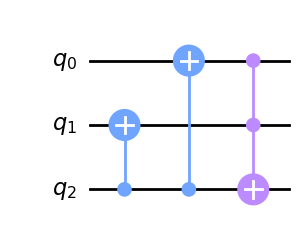

In [10]:
maj_circ = QuantumCircuit(3, name='maj_func')
maj_circ.cx(2,1)
maj_circ.cx(2,0)
maj_circ.ccx(0,1,2)

maj_circ.draw()

In [11]:
maj_inst = maj_circ.to_instruction()

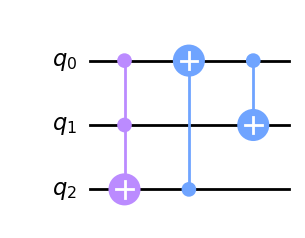

In [12]:
ums_circ = QuantumCircuit(3, name='ums_func')
ums_circ.ccx(0, 1, 2)
ums_circ.cx(2, 0)
ums_circ.cx(0, 1)

ums_circ.draw()

In [13]:
ums_inst = ums_circ.to_instruction()

In [14]:
def execute_circuit(qc):
    # Use Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

    # Grab the results from the job.
    result_sim = job_sim.result()

    counts = result_sim.get_counts(qc)

    return counts

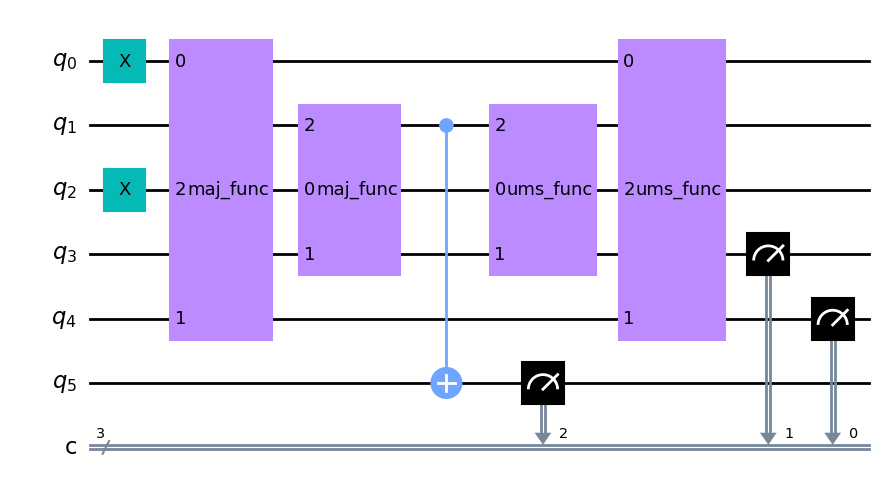

In [15]:
TwoBitRippleAdder(1,0,1).draw()

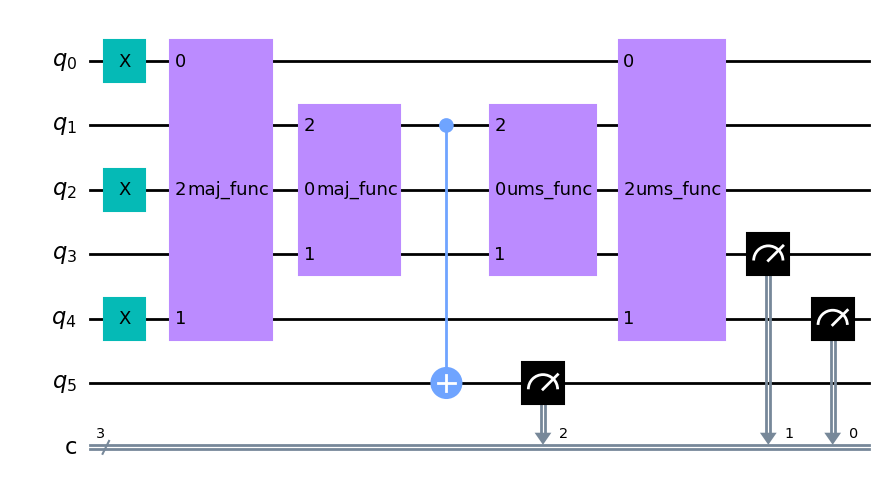

In [16]:
TwoBitRippleAdder(1,1,1).draw()

In [17]:
adder = TwoBitRippleAdder(1,1,0)
execute_circuit(adder)

{'010': 1024}